In [1]:
from google.colab import files
uploaded = files.upload()

Saving Wine.csv to Wine.csv


In [2]:
import pandas as pd

1. Загрузить датасет в DataFrame

In [6]:
df = pd.read_csv("/content/Wine.csv", sep=',')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


2. Исследуйте данные:

-размерность данных

-типы переменных в данных

-есть ли пропуски в данных? если да, то удалите их

In [7]:
print(df.shape, '\n', df.dtypes, '\n', sum(df.isnull().sum()))
#пустых нет

(178, 14) 
 Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object 
 0


3. Выберете переменные которые решили взять в качестве признаков для кластеризации. Объясните почему именно эти признаки взяли для кластеризации

для кластеризации можно взять все столбцы, так как они все описывают признаки (нет столбов с нумерацией, названиями и прочими данными, которые не помогут в кластеризации)

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

4. Подберите число кластеров с помощью метода локтя, график визуалиции обязательно приведите. Объясните почему взяли именно это число кластеров.

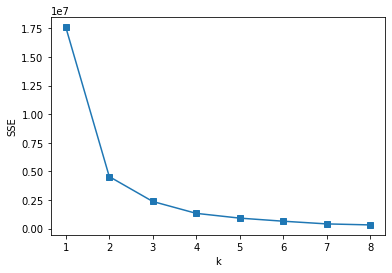

In [14]:
SSE = []

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) 
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

Исходя из графика, можно выбрать 3 кластера, так как при количестве кластеров >3 квадрат ошибки меняется незначительно

5. Разбейте объекты на кластеры с помощью метода kmeans и создайте в датасете новую колонку в которую запишете кластер, в который попал ваш игрок. Сделайте вывод чем похожи игроки внутри класеров или по какому принципу организовались данные кластеры.

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
Y_pred = kmeans.labels_
df['cluster'] = Y_pred
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,1


6. Выберете любые два признака и проведите по ним кластеризацию, визуализируйте полученные кластеры (берем всего 2 признака, чтобы была возможность визуализации кластеров в двумерном пространстве).

In [25]:
X = df.loc[:,['Alcohol','Ash']]
X

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
...,...,...
173,13.71,2.45
174,13.40,2.48
175,13.27,2.26
176,13.17,2.37


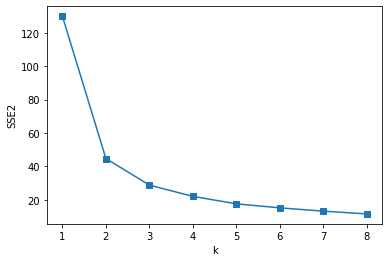

In [27]:

SSE2 = [] 

for k in range(1,9):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    SSE2.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE2, marker='s');
plt.xlabel('k')
plt.ylabel('SSE2');
plt.show()

In [28]:
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(X)
Y2_pred = kmeans2.labels_
X['cluster'] = Y2_pred
X

,Alcohol,Ash,cluster
0,14.23,2.43,1
1,13.20,2.14,0
2,13.16,2.67,0
3,14.37,2.50,1
4,13.24,2.87,0
...,...,...,...
173,13.71,2.45,1
174,13.40,2.48,0
175,13.27,2.26,0
176,13.17,2.37,0


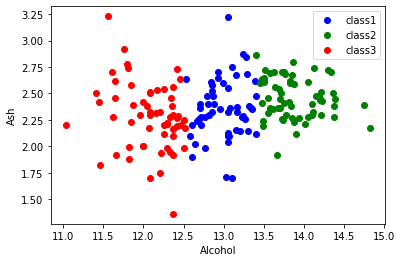

In [29]:
plt.plot(X[X['cluster']==0]['Alcohol'], X[X['cluster']==0]['Ash'], 'bo', label='class1')

plt.plot(X[X['cluster']==1]['Alcohol'], X[X['cluster']==1]['Ash'], 'go', label='class2')

plt.plot(X[X['cluster']==2]['Alcohol'], X[X['cluster']==2]['Ash'], 'ro', label='class3')

plt.xlabel('Alcohol')
plt.ylabel('Ash')
plt.legend(loc=0)
plt.show()